# Data import and cleanup

In [1]:
%cd "C:\Users\David\Downloads\cycle-share-dataset"

In [2]:
import os
os.getcwd()

In [3]:
import csv

with open('station.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        print(row['station_id'], row['current_dockcount'])

In [4]:
#Import all three datasets into their respective objects
#some data in trip may be lossed with this argument (erro_bad_lines)
import pandas as pd
bikerider_df = pd.read_csv("trip.csv", error_bad_lines=False) 
bikerider_Stationdf = pd.read_csv("station.csv") 
bikerider_Weatherdf = pd.read_csv("weather.csv") 



b'Skipping line 50794: expected 12 fields, saw 20\n'


In [5]:
bikerider_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286857 entries, 0 to 286856
Data columns (total 12 columns):
trip_id              286857 non-null int64
starttime            286857 non-null object
stoptime             286857 non-null object
bikeid               286857 non-null object
tripduration         286857 non-null float64
from_station_name    286857 non-null object
to_station_name      286857 non-null object
from_station_id      286857 non-null object
to_station_id        286857 non-null object
usertype             286857 non-null object
gender               181557 non-null object
birthyear            181553 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.3+ MB


In [6]:
#removing duplicates with the first value as unique
bikerider_df.drop_duplicates(subset ="trip_id", keep = 'first', inplace = True) 

# Possible next step

In [7]:
#dropping any rows that have values of nan in tripduration and Precipitation_In in place
#trip_prep_df.dropna(inplace=True)
#trip_prep_df.info()

# What is the most common birth year of a rider?

In [8]:
#Most commmon age via birthyear of a rider(trip_id)
bikerider_df['birthyear'].mode()#32 years of age, 1987

0    1987.0
dtype: float64

# Create a visualization of how trip duration is affected by precipitation.

In [9]:
#checking off the top total trip duration(tripduration) vs. weather(Precipitation_In)
bikerider_df['tripduration'].head(),bikerider_Weatherdf['Precipitation_In'].head()

(0    985.935
 1    926.375
 2    883.831
 3    865.937
 4    923.923
 Name: tripduration, dtype: float64, 0    0.00
 1    0.11
 2    0.45
 3    0.00
 4    0.14
 Name: Precipitation_In, dtype: float64)

In [10]:
#Creating column to join by from stoptime
from datetime import datetime

bikerider_df['Date'] = bikerider_df['stoptime'].apply(lambda x: datetime.strptime(x, "%m/%d/%Y %H:%M").strftime('%m/%d/%Y'))

In [11]:
#bikerider_df['Date'].reset_index()
#bikerider_Weatherdf.set_index('Date')

In [12]:
#joining the two data frames for viz on Date
trip_prep_df = bikerider_df.join(bikerider_Weatherdf.set_index('Date'), on = 'Date')
trip_prep_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236065 entries, 0 to 286856
Data columns (total 33 columns):
trip_id                       236065 non-null int64
starttime                     236065 non-null object
stoptime                      236065 non-null object
bikeid                        236065 non-null object
tripduration                  236065 non-null float64
from_station_name             236065 non-null object
to_station_name               236065 non-null object
from_station_id               236065 non-null object
to_station_id                 236065 non-null object
usertype                      236065 non-null object
gender                        146171 non-null object
birthyear                     146167 non-null float64
Date                          236065 non-null object
Max_Temperature_F             29863 non-null float64
Mean_Temperature_F            29863 non-null float64
Min_TemperatureF              29863 non-null float64
Max_Dew_Point_F               29863 non-

# Matplotlib version

In [13]:
import matplotlib.pyplot as plt
trip_prep_df_hist = trip_prep_df['Precipitation_In'].hist()    
 
#trip_prep_df_hist.savefig('trip_prep_df_hist.pdf')# save figure to disk with give name

# Seaborn Version

In [14]:
#importing seaborn and setting style
import seaborn as sns; sns.set(style="white", color_codes=True)

C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


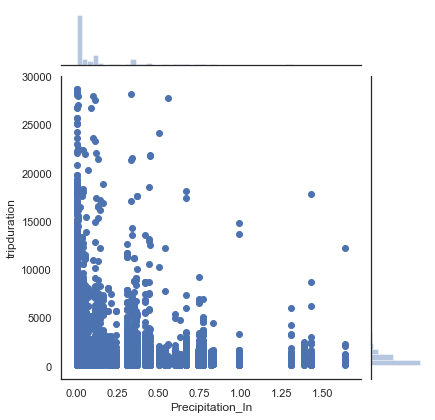

In [15]:
#plot
sns.jointplot(x='Precipitation_In', y='tripduration', data=trip_prep_df)

# Possible next step

In [17]:
#Make an interactive version with bokeh